<h1 align='center'>Machine Learning Lab</h1>
<h3 align='center'>Lab 10</h3>

### Importing Packages

In [1]:
import pandas as pd                                  #Importing Pandas
import numpy as np                                   #Importing Numpy
import matplotlib.pyplot as plt                      #Importing Matplotlib
from sklearn.decomposition import NMF                #Importing SKlearn Non Negative Matrix Factorization
from sklearn.model_selection import GridSearchCV     #Importing GridSearchCV
import warnings                                      #Importing Warnings
warnings.filterwarnings('ignore')

### Exercise 1: Exploring Movie Recommendation Dataset

#### Reading Datasets

##### Reading the dataset file containing Users and Items references

In [2]:
u_data = pd.read_csv('ml-100k/ml-100k/u.data', sep='\t', names=['user id', 'item id', 'rating', 'timestamp'], header=None)
u_data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


##### Reading the Users Data

In [3]:
u_user = pd.read_csv('ml-100k/ml-100k/u.user', sep='|', names=['user id', 'age', 'gender', 'occupation', 'zip code'])
u_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##### Reading the Genre Data

In [4]:
u_genre = pd.read_csv('ml-100k/ml-100k/u.genre', sep='|', names=['genre', 'id'])
u_genre.head()

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


##### Reading the Items/Movies Data

In [5]:
u_item = pd.read_csv('ml-100k/ml-100k/u.item', encoding='latin-1', sep='|', names=['movie id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
u_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Showcasing how the ratings vary across users

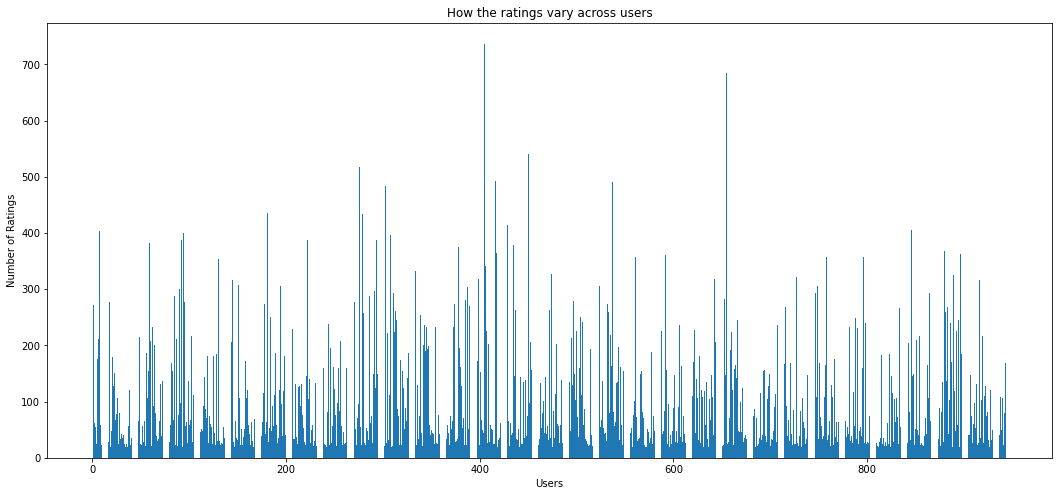

In [6]:
#For finding total ratings across user,
#First we group the data based on user Id and then count the total rows which will indicate total ratings given by users
rating_across_users = u_data.groupby(by = 'user id')['rating'].count().sort_values(ascending=True)

#Plotting the Graph: Users vs Number of Ratings
fig = plt.figure(figsize=(18,8))
plt.bar(rating_across_users.index, rating_across_users.values)
plt.title('How the ratings vary across users')
plt.xlabel('Users')
plt.ylabel('Number of Ratings')
plt.show()

#### Showcase how the ratings vary across items

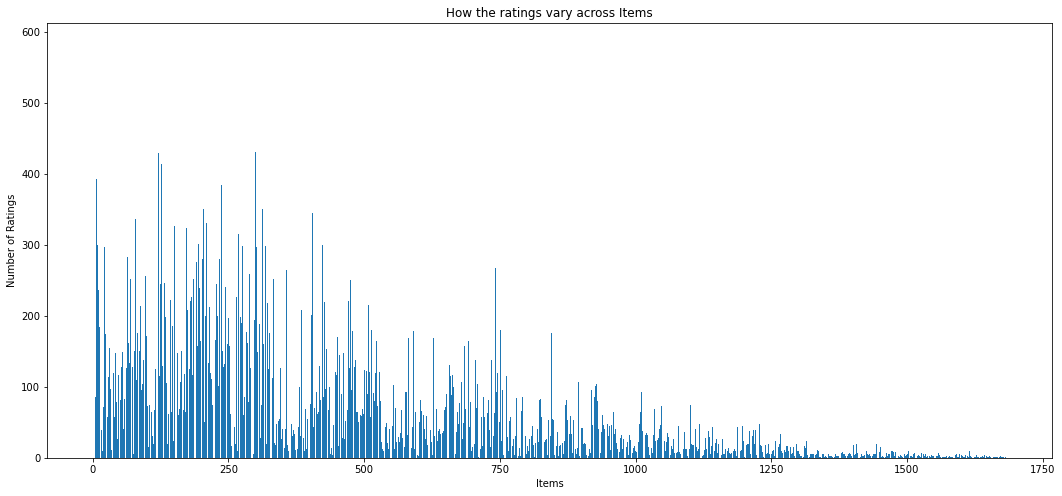

In [7]:
#For finding total ratings across Items,
#First we group the data based on item Id and then count the total rows which will indicate total ratings given for Items
rating_across_items = u_data.groupby(by='item id')['rating'].count().sort_values(ascending = True)

#Plotting the Graph: Users vs Number of Ratings
fig = plt.figure(figsize=(18,8))
plt.bar(rating_across_items.index, rating_across_items.values)
plt.title('How the ratings vary across Items')
plt.xlabel('Items')
plt.ylabel('Number of Ratings')
plt.show()

#### Are there genres that are more highly rated than others?

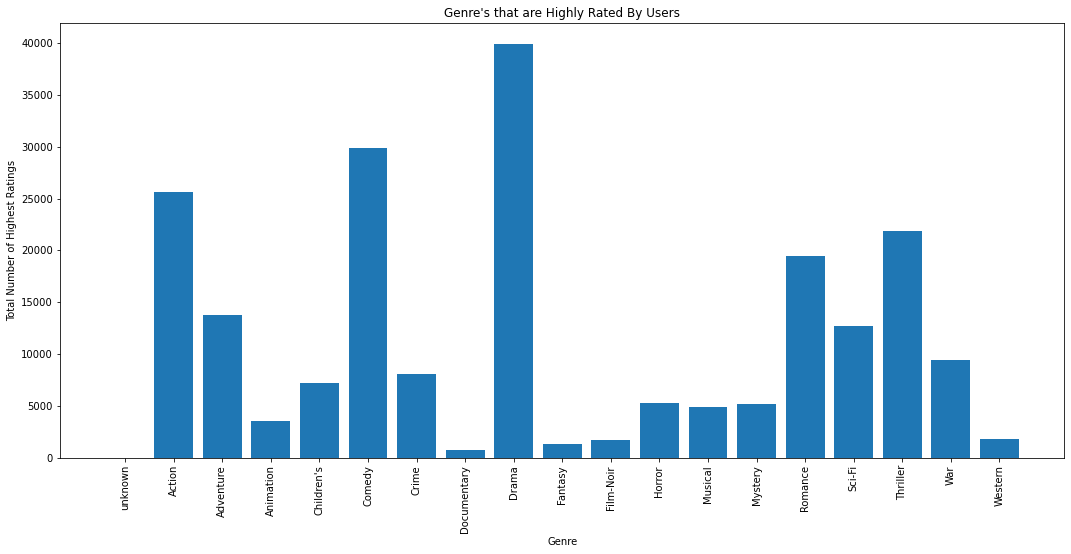

In [8]:
#First Extracting only that rows that has the maximum ratings i.e. 5
#Then to find the genre and there count, we can simply sum up all the rows horizontaly and the result will show there count individually
highest_rated_items = u_data[u_data['rating'] == max(u_data['rating'])]
highest_rated_items = pd.merge(u_data, u_item, left_on='item id', right_on='movie id')
highest_rated_items = (highest_rated_items[list(u_genre['genre'])] == 1).sum(axis=0)

#Plotting the graph indicating total ratings for each genre
fig = plt.figure(figsize=(18,8))
plt.bar(highest_rated_items.index, highest_rated_items.values)
plt.title('Genre\'s that are Highly Rated By Users')
plt.xlabel('Genre')
plt.ylabel('Total Number of Highest Ratings')
plt.xticks(rotation = 90)
plt.show()

#### What age groups prefer what genres based on ratings?

In [9]:
#Defining different age brackets with a difference of 10 each
age_bracket = np.arange(0,80,10)

In [10]:
#Creating a dictionary to hold best genre for each age group
aged_group_preference = {}

#Extracting rows in which the item highest Ratings i.e. 5
merged_df = u_data[u_data['rating'] == max(u_data['rating'])]

#Merging the datasets
merged_df = pd.merge(merged_df, u_item, left_on='item id', right_on='movie id')
merged_df = pd.merge(merged_df, u_user, on='user id')

#Iterating over all the age groups
for age in age_bracket:
    #Extracting ratings which are given by users in the specified age bracket
    aged_df = merged_df[merged_df['age'].between(age, age+10)]
    
    #Suming the Genre count and getting the genre with the maximum count and saving it into the dictionary
    aged_group_preference['{}-{}'.format(age, age+10)] = (aged_df[list(u_genre['genre'])] == 1).sum(axis=0).idxmax(axis = 0)

#Converting the Dictionary into a Dataframe for Displaying the results    
aged_df = pd.DataFrame.from_dict(aged_group_preference, orient='index').reset_index()
aged_df.columns = ['Age Group', 'Popular Genre']
aged_df

,Age Group,Popular Genre
0,0-10,Comedy
1,10-20,Drama
2,20-30,Drama
3,30-40,Drama
4,40-50,Drama
5,50-60,Drama
6,60-70,Drama
7,70-80,Drama


### Exercise 2: Implementing basic matrix factorization (MF) technique for recommender systems

In [11]:
#Initializing the random seed value
random_seed = 3116

#### Normalizing the data

In [12]:
def normalize_matrix(matrix):
    #Normalizing the dataset by: (X - X.mean)/X.standard_Deviation
    return (matrix - matrix.mean())/matrix.std()

#### Function to transform the dataset into a Rating Matrix of Users and Item

In [13]:
def extract_rating_matrix(dataset):
    #Initializing the rating matrix with zeros
    rating_matrix = np.zeros(shape=(number_of_users, number_of_items))
    
    #Iterating over all the rows of the dataset
    for row in dataset:
        #The row represent the users and the column represent the items and the corresponding value represent the rating for that item
        rating_matrix[row[0]-1, row[1]-1] = row[2]
    
    #Returning the Rating matrix
    return rating_matrix

#### Function to perform K-fold cross validation and return the training and the validation sets

In [14]:
def k_fold_cross_validation(dataset, k, K):
    #Checking if the given k is larger than the allowed K partitions
    if k >= K:
        raise Exception('The Requested k-Fold should not be Greater than total Folds')
    
    #Calculating the Validation set size based on dataset size and total partitions given
    set_size = int(len(dataset)/K)
    
    #Splitting the Dataset into Training and Validation sets based on set size.The size
    #set size calculated above and all the remaining data points after removing test
    dataset_train = np.delete(dataset,[i for i in range(k*set_size,(k*set_size)+set_size)],axis=0)
    dataset_validation = dataset[k*set_size:(k*set_size)+set_size,:]
    
    #Returning the created Training and Validation datasets.
    return dataset_train, dataset_validation

#### Function to calculate the RMSE between the actual rating matrix and the predicted rating matrix

In [15]:
def rmse(rating_matrix, p , q):
    #Returning the RMSE
    return np.sqrt(np.divide(np.sum(np.square(np.subtract(rating_matrix, np.dot(p, q)))),rating_matrix.shape[0] * rating_matrix.shape[1]))

#### Function which implements Stochastic Gradient Descent (SGD) for learning the matrix P and Q

In [16]:
def learn_latent_factors(dataset_train, dataset_test, lamda, alpha, K):
    #Extracting and normalizing the Rating matrix of the Training dataset
    r = normalize_matrix(extract_rating_matrix(dataset_train))
    
    #Extracting and normalizing the Rating matrix of the Test dataset
    r_v = normalize_matrix(extract_rating_matrix(dataset_test))
    
    #Intializing the random P and Q matrix for matrix factorization, there dimensions are as follows:
    #P -> (# of users, K latent Features)
    #Q -> (K latent Features, # of Items)
    p = np.random.normal(normal_dis_mean, normal_dis_std, size = (number_of_users, K))
    q = np.random.normal(normal_dis_mean, normal_dis_std, size = (K, number_of_items))
    
    #Intializing lists for storing the train and test RMSE in each Epochs
    train_rmse = np.array([])
    validation_rmse = np.array([])
    
    #Learning the matrix P and Q for specified number of Epochs
    for i in range(epochs):
        #Iterating over all the rows in the training dataset
        for row in dataset_train:
            #Extracting the User Id and Item Id from the row
            user_id, item_id = row[0] - 1, row[1] - 1
            
            #Calculating the difference between the actual rating and the predicted rating
            e = r[user_id, item_id] - np.dot(p[user_id,:], q[:,item_id])

            #Iterating over all the latent feature
            for k in range(K):
                #Updating the values of Pu,k and Qi,k
                p[user_id, k] = p[user_id, k] + alpha * (e * q[k, item_id] - lamda * p[user_id, k])
                q[k, item_id] = q[k, item_id] + alpha * (e * p[user_id, k] - lamda * q[k, item_id])
        
        #Appending the Train and Validating RMSE in the list
        train_rmse = np.append(train_rmse, rmse(r, p, q))
        validation_rmse = np.append(validation_rmse, rmse(r_v, p, q))
        
        #Checking the Stopping Condition,Stopping the Learning process when the difference between the last two epoch is negligible
        if i > 1 and (validation_rmse[-2] - validation_rmse[-1] < 0.001):
            break
    
    #Returning the calculated P, Q, Train RMSE and Validation RMSE
    return p, q, train_rmse, validation_rmse

#### Optimizing the hyper-parameters i.e. regularization constant, learning rate, k latent dimensions

##### Initializing variables to be used by different functions

In [17]:
#Number of Unique Users in the Dataset
number_of_users = len(u_user)

#Number of Unique Items in the Dataset
number_of_items = len(u_item)

#Initializing the Training set Size 
train_ratio = 0.9

##### Initializing variables storing the values of parameters of different algorithm

In [18]:
#Number of Epochs
epochs = 10

#Mean for Normal Distribution samples
normal_dis_mean = 0

#Standard Deviation for Normal Distribution samples
normal_dis_std = 1

#Number of Folds for K fold cross validation
K_folds = 5

##### Initializing different Hyperparameters sets for Hyperparameter Optimization

In [19]:
lamdas = [0.1, 0.2, 0.3]
alphas = [0.005, 0.003, 0.001]
latent_k = [10,20,30]

##### Merging and Splitting the Dataset

In [20]:
#Merging the u.data and u.item dataset
merged_df = pd.merge(u_data, u_item, left_on='item id', right_on='movie id')

#Merging the merged dataset with u.users
merged_df = pd.merge(merged_df, u_user, on='user id')

In [21]:
#Extracting the rows randomly from the merged dataset for Training set
merged_train = merged_df.sample(frac=train_ratio)

#Droping that rows which are included in training dataset
merged_test = merged_df.drop(merged_train.index)

#Converting the dataset into numpy arrays
merged_train = merged_train.to_numpy()
merged_test = merged_test.to_numpy()

##### Performing the Hyperparameter Optimization

In [22]:
#Initializing a matrix for storing the training RMSE for each Hyperparameter combination
hyperparameters_train_rmse = np.zeros(shape=(len(lamdas),len(alphas),len(latent_k)))

#Initializing a matrix for storing the Validating RMSE for each Hyperparameter combination
hyperparameters_validation_rmse = np.zeros(shape=(len(lamdas),len(alphas),len(latent_k)))

In [23]:
#Iterating for all values of Lambdas
for index_l, lamda in enumerate(lamdas):
    
    #Iterating for all values of Alphas
    for index_a, alpha in enumerate(alphas):
        
        #Iterating for all values of Latent Features
        for index_lk, l_k in enumerate(latent_k):
            
            #Initializing the average Training and Validating RMSE for each K fold
            average_train_rmse, average_validation_rmse = 0 , 0
            
            #Iterating for all values of K fold
            for k in range(K_folds):
                
                #Splitting the training dataset into Train and Validation using K fold Cross validation
                train, validation = k_fold_cross_validation(merged_train, k, K_folds)
                
                #Applying the SGD for Calculating the matrix P and Q using a hyperparameter combination
                p, q, train_rmse, validation_rmse = learn_latent_factors(merged_train, validation, lamda, alpha, l_k)
                
                #Adding the Training and Validation RMSE
                average_train_rmse += train_rmse[-1]
                average_validation_rmse += validation_rmse[-1]
                
            #Averaging the values for Train and Validation RMSE
            average_train_rmse, average_validation_rmse = average_train_rmse/K_folds, average_validation_rmse/K_folds
            
            #Printing the Output of RMSE for selected Hyperparameter Combination
            print('Hyperparameter Selected: ')
            print('Lambda: {}\tAlpha: {}\tLatent Features: {}'.format(lamda, alpha, l_k))
            print('Training RMSE: {}\tValidation RMSE: {}\n'.format(average_train_rmse, average_validation_rmse))
            
            #Saving the calculated RMSE in the list of both Training and Validation
            hyperparameters_train_rmse[index_l,index_a,index_lk] = average_train_rmse
            hyperparameters_validation_rmse[index_l,index_a,index_lk] = average_validation_rmse
                

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.005	Latent Features: 10
Training RMSE: 2.868509893658427	Validation RMSE: 2.9597379940278317

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.005	Latent Features: 20
Training RMSE: 3.342494949756881	Validation RMSE: 3.426598602951947

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.005	Latent Features: 30
Training RMSE: 3.6669460422303857	Validation RMSE: 3.7275822539444823

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.003	Latent Features: 10
Training RMSE: 2.6233389226393014	Validation RMSE: 2.72348065261489

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.003	Latent Features: 20
Training RMSE: 3.2864389817621222	Validation RMSE: 3.3727021002841555

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.003	Latent Features: 30
Training RMSE: 3.750172900671404	Validation RMSE: 3.817480761038103

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.001	Latent Features: 10
Training RMSE: 2.458437646820484	Validation RMSE: 2.51997618557773

Hyperparameter S

#### Computing the Validation RMSE

##### Finding the Best Hyperparameter Combination

In [24]:
#Finding the index containing the minimum RMSE
i,j,k = np.where(hyperparameters_validation_rmse == hyperparameters_validation_rmse.min())

#Printing the Results
print('Best Hyperparameter with the Minimum Validation RMSE:')
print('Lambda: {}\tAlpha: {}\tLatent Features: {}'.format(lamdas[i.item()],alphas[j.item()],latent_k[k.item()]))
print('Validation RMSE: {}'.format(hyperparameters_validation_rmse[i,j,k].item()))

Best Hyperparameter with the Minimum Validation RMSE:
Lambda: 0.3	Alpha: 0.001	Latent Features: 10
Validation RMSE: 2.3355294300340343


#### Computing the Test RMSE

In [25]:
#Performing Matrix Factorization on the Test Dataset with Best Combination of Hyperparameters
best_lamda, best_alpha, best_latent_k = lamdas[i.item()], alphas[j.item()], latent_k[k.item()]
p, q, train_rmse, test_rmse = learn_latent_factors(merged_train, merged_test, best_lamda, best_alpha, best_latent_k)
print('The Test RMSE: {}'.format(test_rmse[-1]))

The Test RMSE: 2.3302891774428147


##### Plotting the Training RMSE vs Test RMSE for each Epochs

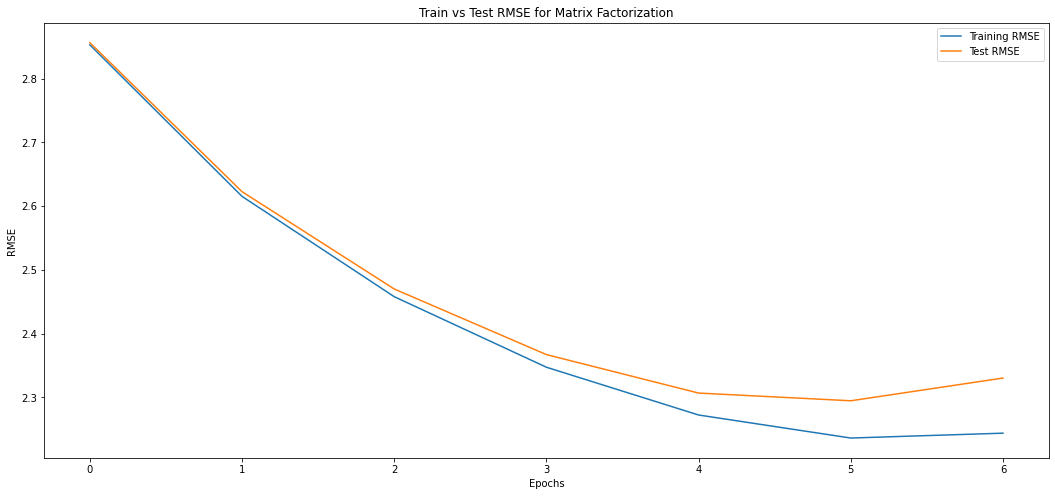

In [26]:
fig = plt.figure(figsize=(18,8))
plt.plot([i for i in range(len(train_rmse))], train_rmse, label='Training RMSE')
plt.plot([i for i in range(len(test_rmse))], test_rmse, label='Test RMSE')
plt.title('Train vs Test RMSE for Matrix Factorization')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Exercise 3: Recommender Systems using matrix factorization sckitlearn

#### Performing the Hyperparameter Optimization using Grid Search

In [27]:
#Initializing a matrix for storing the training RMSE for each Hyperparameter combination
hyperparameters_train_rmse = np.zeros(shape=(len(lamdas),len(latent_k)))

#Initializing a matrix for storing the Validating RMSE for each Hyperparameter combination
hyperparameters_validation_rmse = np.zeros(shape=(len(lamdas),len(latent_k)))

In [28]:
#Iterating for all values of Lambdas
for index_l, lamda in enumerate(lamdas):
    
    #Iterating for all values of Latent Features
    for index_lk, l_k in enumerate(latent_k):
        
        #Initializing the average Training and Validating RMSE for each K fold
        average_train_rmse, average_validation_rmse = 0 , 0
        
        #Iterating for all values of K fold
        for k in range(K_folds):
            
            #Splitting the training dataset into Train and Validation using K fold Cross validation
            train, validation = k_fold_cross_validation(merged_train, k, K_folds)
            
            #Using Sklearn NMF function to Matrix Factorization
            model = NMF(init='random',n_components = l_k, alpha=lamda, random_state=random_seed)
            
            #Extracting matrix W after fitting the Training Rating Matrix
            W = model.fit_transform(extract_rating_matrix(train))
            
            #Extracting matrix H after fitting the Training Rating Matrix
            H = model.components_
            
            #Adding the Training and Validation RMSE
            average_train_rmse += rmse(extract_rating_matrix(train), W, H)
            average_validation_rmse += rmse(extract_rating_matrix(validation), W, H)
        
        #Averaging the values for Train and Validation RMSE
        average_train_rmse, average_validation_rmse = average_train_rmse/K_folds, average_validation_rmse/K_folds
        
        #Printing the Output of RMSE for selected Hyperparameter Combination
        print('Hyperparameter Selected: ')
        print('Lambda: {}\tAlpha: {}\tLatent Features: {}'.format(lamda, alpha, l_k))
        print('Training RMSE: {}\tValidation RMSE: {}\n'.format(average_train_rmse, average_validation_rmse))
        
        #Saving the calculated RMSE in the list of both Training and Validation
        hyperparameters_train_rmse[index_l,index_lk] = average_train_rmse
        hyperparameters_validation_rmse[index_l,index_lk] = average_validation_rmse

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.001	Latent Features: 10
Training RMSE: 0.6455496004386772	Validation RMSE: 0.5209734831178708

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.001	Latent Features: 20
Training RMSE: 0.6261437430899222	Validation RMSE: 0.5438638955517104

Hyperparameter Selected: 
Lambda: 0.1	Alpha: 0.001	Latent Features: 30
Training RMSE: 0.6109459061417086	Validation RMSE: 0.5647186020802145

Hyperparameter Selected: 
Lambda: 0.2	Alpha: 0.001	Latent Features: 10
Training RMSE: 0.6455410880933105	Validation RMSE: 0.5208110910569509

Hyperparameter Selected: 
Lambda: 0.2	Alpha: 0.001	Latent Features: 20
Training RMSE: 0.6261731256168357	Validation RMSE: 0.543679951253973

Hyperparameter Selected: 
Lambda: 0.2	Alpha: 0.001	Latent Features: 30
Training RMSE: 0.6110123444640454	Validation RMSE: 0.5642144169255127

Hyperparameter Selected: 
Lambda: 0.3	Alpha: 0.001	Latent Features: 10
Training RMSE: 0.6455446309854551	Validation RMSE: 0.5206179302358835

Hyperpa

#### Computing the Validation RMSE

##### Finding the Best Hyperparameter Combination

In [29]:
#Finding the index containing the minimum RMSE
i,j = np.where(hyperparameters_validation_rmse == hyperparameters_validation_rmse.min())

#Printing the Results
print('Best Hyperparameter with the Minimum Validation RMSE:')
print('Lambda: {}\tLatent Features: {}'.format(lamdas[i.item()],latent_k[j.item()]))
print('Validation RMSE: {}'.format(hyperparameters_validation_rmse[i,j].item()))

Best Hyperparameter with the Minimum Validation RMSE:
Lambda: 0.3	Latent Features: 10
Validation RMSE: 0.5206179302358835


#### Computing the Test RMSE

In [30]:
#Performing Matrix Factorization on the Test Dataset with Best Combination of Hyperparameters
test_model = NMF(init='random',n_components = 10, alpha=0.3, random_state=random_seed)

#Extracting matrix W after fitting the Training Rating Matrix
W = test_model.fit_transform(extract_rating_matrix(merged_test))

#Extracting matrix H after fitting the Training Rating Matrix
H = test_model.components_

In [31]:
print('Test RMSE: {}'.format(rmse(extract_rating_matrix(merged_test), W, H)))

Test RMSE: 0.27566461477377874
